In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
filename = glob.iglob('*.csv')
df = pd.read_csv(*filename)
print(f"The Dimension of the dataset is - {df.shape}")

The Dimension of the dataset is - (683, 11)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


In [7]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [8]:
X

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]],
      dtype=int64)

In [9]:
Y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [10]:
print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (683, 10)
Y: (683,)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.175,
                                                    random_state = 0)

In [12]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (563, 10)
X_test: (120, 10)
Y_train: (563,)
Y_test: (120,)


In [13]:
#Building our baseline dummy classifier
clf = DummyClassifier()
clf.fit(X_train, Y_train)

#Predicting Results
y_pred = clf.predict(X_test)

#Calculating Resulta
print("CM: \n",confusion_matrix(Y_test, y_pred))
print("acc: {0}%".format(accuracy_score(Y_test, y_pred) * 100))

CM: 
 [[77  0]
 [43  0]]
acc: 64.16666666666667%


## XGBoost Classifier

In [14]:
xgbclassifier = XGBClassifier(n_jobs = -1)
xgbclassifier.fit(X_train, Y_train)

[01:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
xg_pred = xgbclassifier.predict(X_test)
xg_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [16]:
# Model Evaluation
cm = confusion_matrix(Y_test, xg_pred)
cm

array([[74,  3],
       [ 2, 41]], dtype=int64)

In [17]:
acc = accuracy_score(Y_test, xg_pred)
print(f"The Accuray of the model is - {acc*100:.2f}%")

The Accuray of the model is - 95.83%


In [18]:
report = classification_report(Y_test, xg_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.96      0.97        77
           4       0.93      0.95      0.94        43

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120



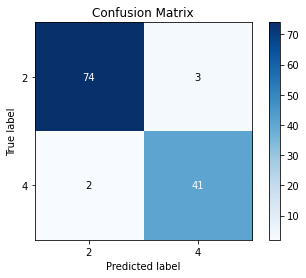

In [19]:
## Plotting a Beautiful Confusion Maitrx
skplt.metrics.plot_confusion_matrix(Y_test, xg_pred)
plt.show()

## K-fold Cross Validation - XGBoost

In [27]:
accuracies = cross_val_score(estimator = xgbclassifier,
                             X = X_train,
                             y = Y_train,
                             cv=10,
                             n_jobs=-1,
                             verbose=1)
print(f"Accuracy of the model is - {accuracies.mean()*100:.3f}%")
print(f"Standard Deviation of the model is - {accuracies.std()*100:.3f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


Accuracy of the model is - 97.171%
Standard Deviation of the model is - 2.379


## CatBoost Classifier

In [20]:
cbclassifier = CatBoostClassifier(verbose=1)
cbclassifier.fit(X_train, Y_train)

Learning rate set to 0.008061
0:	learn: 0.6775325	total: 110ms	remaining: 1m 50s
1:	learn: 0.6647778	total: 118ms	remaining: 59.1s
2:	learn: 0.6510680	total: 128ms	remaining: 42.4s
3:	learn: 0.6362780	total: 135ms	remaining: 33.5s
4:	learn: 0.6211661	total: 141ms	remaining: 28.1s
5:	learn: 0.6071090	total: 146ms	remaining: 24.3s
6:	learn: 0.5927772	total: 152ms	remaining: 21.6s
7:	learn: 0.5779935	total: 156ms	remaining: 19.4s
8:	learn: 0.5630569	total: 160ms	remaining: 17.6s
9:	learn: 0.5496975	total: 164ms	remaining: 16.2s
10:	learn: 0.5364414	total: 168ms	remaining: 15.1s
11:	learn: 0.5225852	total: 172ms	remaining: 14.2s
12:	learn: 0.5111916	total: 175ms	remaining: 13.3s
13:	learn: 0.4995902	total: 178ms	remaining: 12.6s
14:	learn: 0.4878999	total: 181ms	remaining: 11.9s
15:	learn: 0.4771662	total: 183ms	remaining: 11.3s
16:	learn: 0.4668051	total: 186ms	remaining: 10.7s
17:	learn: 0.4563519	total: 188ms	remaining: 10.3s
18:	learn: 0.4447997	total: 191ms	remaining: 9.85s
19:	learn:

187:	learn: 0.0685980	total: 846ms	remaining: 3.65s
188:	learn: 0.0682356	total: 851ms	remaining: 3.65s
189:	learn: 0.0679008	total: 855ms	remaining: 3.64s
190:	learn: 0.0675724	total: 858ms	remaining: 3.63s
191:	learn: 0.0671072	total: 863ms	remaining: 3.63s
192:	learn: 0.0668397	total: 866ms	remaining: 3.62s
193:	learn: 0.0665269	total: 869ms	remaining: 3.61s
194:	learn: 0.0662171	total: 873ms	remaining: 3.6s
195:	learn: 0.0658645	total: 878ms	remaining: 3.6s
196:	learn: 0.0655467	total: 882ms	remaining: 3.59s
197:	learn: 0.0651603	total: 886ms	remaining: 3.59s
198:	learn: 0.0648398	total: 890ms	remaining: 3.58s
199:	learn: 0.0645168	total: 894ms	remaining: 3.58s
200:	learn: 0.0641425	total: 898ms	remaining: 3.57s
201:	learn: 0.0638093	total: 901ms	remaining: 3.56s
202:	learn: 0.0635340	total: 906ms	remaining: 3.56s
203:	learn: 0.0633049	total: 909ms	remaining: 3.55s
204:	learn: 0.0629714	total: 913ms	remaining: 3.54s
205:	learn: 0.0626899	total: 917ms	remaining: 3.54s
206:	learn: 0.

384:	learn: 0.0333997	total: 1.68s	remaining: 2.68s
385:	learn: 0.0333296	total: 1.68s	remaining: 2.68s
386:	learn: 0.0332602	total: 1.69s	remaining: 2.67s
387:	learn: 0.0331787	total: 1.69s	remaining: 2.67s
388:	learn: 0.0331006	total: 1.7s	remaining: 2.66s
389:	learn: 0.0330003	total: 1.7s	remaining: 2.66s
390:	learn: 0.0329246	total: 1.7s	remaining: 2.65s
391:	learn: 0.0328229	total: 1.71s	remaining: 2.65s
392:	learn: 0.0327621	total: 1.71s	remaining: 2.64s
393:	learn: 0.0327151	total: 1.72s	remaining: 2.64s
394:	learn: 0.0326067	total: 1.72s	remaining: 2.63s
395:	learn: 0.0325292	total: 1.72s	remaining: 2.63s
396:	learn: 0.0324395	total: 1.73s	remaining: 2.62s
397:	learn: 0.0323797	total: 1.73s	remaining: 2.62s
398:	learn: 0.0322684	total: 1.74s	remaining: 2.61s
399:	learn: 0.0321906	total: 1.74s	remaining: 2.61s
400:	learn: 0.0320962	total: 1.74s	remaining: 2.6s
401:	learn: 0.0320221	total: 1.75s	remaining: 2.6s
402:	learn: 0.0319522	total: 1.75s	remaining: 2.59s
403:	learn: 0.031

547:	learn: 0.0228464	total: 2.35s	remaining: 1.94s
548:	learn: 0.0227799	total: 2.35s	remaining: 1.94s
549:	learn: 0.0227217	total: 2.36s	remaining: 1.93s
550:	learn: 0.0226556	total: 2.36s	remaining: 1.93s
551:	learn: 0.0226325	total: 2.37s	remaining: 1.92s
552:	learn: 0.0226152	total: 2.37s	remaining: 1.92s
553:	learn: 0.0225606	total: 2.37s	remaining: 1.91s
554:	learn: 0.0224909	total: 2.38s	remaining: 1.91s
555:	learn: 0.0224292	total: 2.38s	remaining: 1.9s
556:	learn: 0.0223800	total: 2.39s	remaining: 1.9s
557:	learn: 0.0222954	total: 2.39s	remaining: 1.89s
558:	learn: 0.0222674	total: 2.39s	remaining: 1.89s
559:	learn: 0.0222260	total: 2.4s	remaining: 1.88s
560:	learn: 0.0221772	total: 2.4s	remaining: 1.88s
561:	learn: 0.0221477	total: 2.41s	remaining: 1.88s
562:	learn: 0.0220890	total: 2.41s	remaining: 1.87s
563:	learn: 0.0220487	total: 2.42s	remaining: 1.87s
564:	learn: 0.0219754	total: 2.42s	remaining: 1.86s
565:	learn: 0.0219327	total: 2.42s	remaining: 1.86s
566:	learn: 0.02

713:	learn: 0.0161575	total: 3.04s	remaining: 1.22s
714:	learn: 0.0161256	total: 3.04s	remaining: 1.21s
715:	learn: 0.0161013	total: 3.05s	remaining: 1.21s
716:	learn: 0.0160786	total: 3.05s	remaining: 1.2s
717:	learn: 0.0160481	total: 3.05s	remaining: 1.2s
718:	learn: 0.0159973	total: 3.06s	remaining: 1.2s
719:	learn: 0.0159626	total: 3.06s	remaining: 1.19s
720:	learn: 0.0159280	total: 3.07s	remaining: 1.19s
721:	learn: 0.0158973	total: 3.07s	remaining: 1.18s
722:	learn: 0.0158562	total: 3.08s	remaining: 1.18s
723:	learn: 0.0158399	total: 3.08s	remaining: 1.17s
724:	learn: 0.0158149	total: 3.08s	remaining: 1.17s
725:	learn: 0.0157911	total: 3.09s	remaining: 1.16s
726:	learn: 0.0157661	total: 3.09s	remaining: 1.16s
727:	learn: 0.0157354	total: 3.09s	remaining: 1.16s
728:	learn: 0.0157009	total: 3.1s	remaining: 1.15s
729:	learn: 0.0156797	total: 3.1s	remaining: 1.15s
730:	learn: 0.0156540	total: 3.11s	remaining: 1.14s
731:	learn: 0.0156322	total: 3.11s	remaining: 1.14s
732:	learn: 0.015

881:	learn: 0.0118611	total: 3.71s	remaining: 497ms
882:	learn: 0.0118355	total: 3.72s	remaining: 493ms
883:	learn: 0.0118047	total: 3.72s	remaining: 489ms
884:	learn: 0.0117777	total: 3.73s	remaining: 484ms
885:	learn: 0.0117467	total: 3.73s	remaining: 480ms
886:	learn: 0.0117300	total: 3.73s	remaining: 476ms
887:	learn: 0.0116963	total: 3.74s	remaining: 472ms
888:	learn: 0.0116787	total: 3.74s	remaining: 468ms
889:	learn: 0.0116592	total: 3.75s	remaining: 463ms
890:	learn: 0.0116256	total: 3.75s	remaining: 459ms
891:	learn: 0.0116050	total: 3.76s	remaining: 455ms
892:	learn: 0.0115892	total: 3.76s	remaining: 451ms
893:	learn: 0.0115749	total: 3.77s	remaining: 446ms
894:	learn: 0.0115549	total: 3.77s	remaining: 442ms
895:	learn: 0.0115219	total: 3.77s	remaining: 438ms
896:	learn: 0.0115020	total: 3.78s	remaining: 434ms
897:	learn: 0.0114884	total: 3.78s	remaining: 429ms
898:	learn: 0.0114720	total: 3.78s	remaining: 425ms
899:	learn: 0.0114523	total: 3.79s	remaining: 421ms
900:	learn: 

In [21]:
cb_pred = cbclassifier.predict(X_test)
cb_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2], dtype=int64)

In [22]:
cm = confusion_matrix(Y_test, cb_pred)
cm

array([[74,  3],
       [ 0, 43]], dtype=int64)

In [23]:
acc = accuracy_score(Y_test, cb_pred)
print(f"The Accuray of the model is - {acc*100:.2f}%")

The Accuray of the model is - 97.50%


In [24]:
report = classification_report(Y_test, cb_pred)
print(report)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        77
           4       0.93      1.00      0.97        43

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



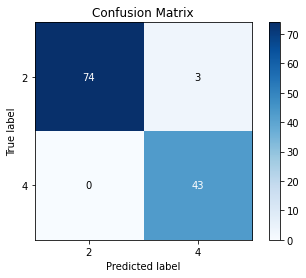

In [25]:
## Plotting a Beautiful Confusion Maitrx
skplt.metrics.plot_confusion_matrix(Y_test, cb_pred)
plt.show()

## K-fold Cross Validation - CatBoost

In [26]:
accuracies = cross_val_score(estimator = cbclassifier,
                             X = X_train,
                             y = Y_train,
                             cv=10,
                             n_jobs=-1,
                             verbose=1)
print(f"Accuracy of the model is - {accuracies.mean()*100:.3f}%")
print(f"Standard Deviation of the model is - {accuracies.std()*100:.3f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   36.2s remaining:   24.1s


Accuracy of the model is - 97.346%
Standard Deviation of the model is - 2.265


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.0s finished
